In [1]:
import pandas as pd

In [2]:
# loading mosnet results
df = pd.read_csv('MOSnet_result_raw.txt', sep=' ', names=['file', 'score'])

In [3]:
# processing filenames into the name of the file and type(before or after separation)
df['fname']=df['file'].str.split('/').str[-1]
df['name']=df['fname'].str.split('_').str[::2].str.join("_")
df['type']=df['fname'].str.split('_').str[1]

## Description of the MOSnet results
The MOSnet model used for this analysis was the CNN_BLSTM
We can see that the mean MOSnet value of the original recordings is ~3.1. After mixing and separation this value falls to ~2.8. The median values are a bit lower in both cases.

In [4]:
df.groupby('type').describe()

score                                                           
            count      mean       std    min      25%     50%     75%    max
type                                                                        
original    400.0  3.107175  0.503725  1.998  2.81025  2.9815  3.3040  5.173
separation  400.0  2.832817  0.390763  1.949  2.60350  2.7895  2.9875  4.453

### Change
This corresponds to nearly a 9% decrease in score

In [5]:
means=df.groupby('type').describe()['score', 'mean']
original_mean=means[0]
separated_mean=means[1]
100*(separated_mean-original_mean)/original_mean

-8.829805208911626

In [6]:
df=df[~df['type'].isna()]

## MOSnet deltas
Now we look at the difference before and after separation. We see that in some cases, 29% of the samples, the score actually increases after separation. Generally, we do see the .3 score improvement noted above with some instances increasing by more than 2.

<AxesSubplot:>

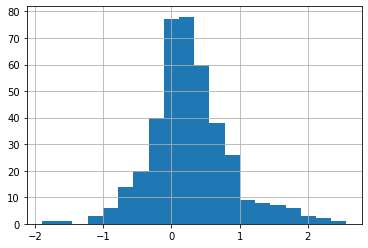

In [7]:
ddf=df.pivot(columns='type', values='score', index='name')
(ddf['original']-ddf['separation']).hist(bins=20)

In [8]:
ddf.reset_index().to_csv("MOSnet_results_before_after.csv", index=False)

In [9]:
ddf['improved']=(ddf['original']-ddf['separation'])<0
ddf['improved'].mean()

0.29